In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("dark")
import plotly.graph_objects as go
import plotly.offline as pyo
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset 1, General Criminal Data (Primary dataset)

In [3]:
df=pd.read_csv("crime.csv",encoding='iso-8859-1',na_values="null")
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,9/2/2018 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,8/21/2018 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,9/3/2018 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,9/3/2018 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,9/3/2018 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
len(df)

319073

In [76]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [77]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [4]:
df['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

**Use heatmap here to plot out null values**

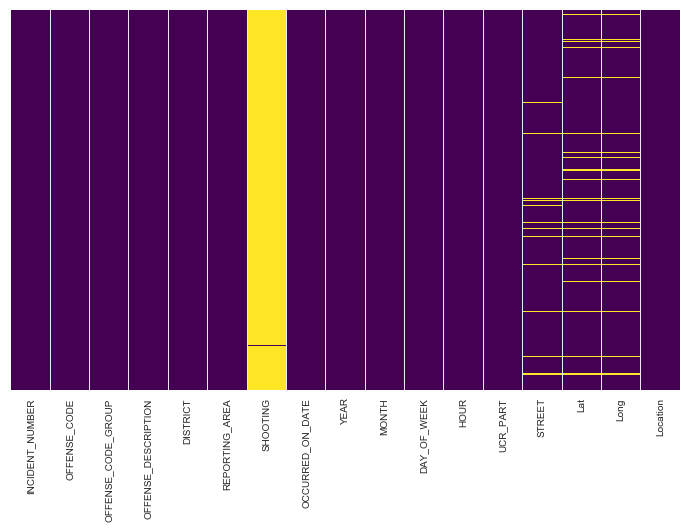

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [78]:
#Drop columns which are irrelevant here
df=df.drop(['SHOOTING','INCIDENT_NUMBER'],axis=1)  

**Check and drop null values**

In [79]:
df.isnull().sum()

OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                 10871
Lat                    19999
Long                   19999
Location                   0
dtype: int64

Check if Reporting Area is null when null values exists in "DISTRICT"

In [80]:
df[df['DISTRICT']==np.nan]['REPORTING_AREA']

Series([], Name: REPORTING_AREA, dtype: object)

So drop both null values in "DISTRICT" would do the same to "REPORTING_AREA"

In [81]:
df.dropna(subset=['DISTRICT'],inplace=True)

In [82]:
df.dropna(subset=['UCR_PART'],inplace=True)

In [83]:
df.isnull().sum()

OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                   0
STREET                  9824
Lat                    19715
Long                   19715
Location                   0
dtype: int64

Check if number of null records in "Location" matches number of null records in "Lat" / "Long", which is 19175

In [84]:
def find_zero(val):
    if '0.0000' in val:
        return True
    else:
        return False      

In [85]:
df['Location'].apply(lambda x : find_zero(x)).sum()

19715

Unable to replace "Lat" & "Long" with values in "Location"

### Dataset 2, offense codes

In [86]:
code=pd.read_csv("offense_codes.csv",encoding='iso-8859-1')
code.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [87]:
len(code)

576

**Drop Duplicates in column "CODE"**

In [88]:
code.drop_duplicates('CODE',keep='first',inplace=True)

In [89]:
len(code)

425

**Convert offense codes in crime datasets into actual types based on information in "offense_codes.csv"**

In [90]:
code_dict=code.set_index('CODE').T.to_dict('index')
code_dict['NAME']

{612: 'LARCENY PURSE SNATCH - NO FORCE ',
 613: 'LARCENY SHOPLIFTING',
 615: 'LARCENY THEFT OF MV PARTS & ACCESSORIES',
 1731: 'INCEST',
 3111: 'LICENSE PREMISE VIOLATION',
 2646: 'LIQUOR - DRINKING IN PUBLIC',
 2204: 'LIQUOR LAW VIOLATION',
 3810: 'M/V ACCIDENT - INVOLVING ÊBICYCLE - INJURY',
 3801: 'M/V ACCIDENT - OTHER',
 3807: 'M/V ACCIDENT - OTHER CITY VEHICLE',
 3803: 'M/V ACCIDENT - PERSONAL INJURY',
 3805: 'M/V ACCIDENT - POLICE VEHICLE',
 3802: 'M/V ACCIDENT - PROPERTY ÊDAMAGE',
 3205: 'M/V PLATES - LOST',
 123: 'MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE',
 121: 'MANSLAUGHTER - VEHICLE - NEGLIGENCE',
 3501: 'MISSING PERSON',
 3502: 'MISSING PERSON - LOCATED',
 3503: 'MISSING PERSON - NOT REPORTED - LOCATED',
 111: 'MURDER, NON-NEGLIGIENT MANSLAUGHTER',
 3303: 'NOISY PARTY/RADIO-ARREST',
 2623: 'OBSCENE MATERIALS - PORNOGRAPHY',
 2628: 'OBSCENE PHONE CALLS',
 1711: 'OPEN & GROSS LEWDNESS',
 2007: 'VIOL. OF RESTRAINING ORDER W NO ARREST',
 2102: 'OPERATING UNDER THE INFLUENCE DRUG

In [91]:
df['OFFENSE_TYPE']=df['OFFENSE_CODE'].map(code_dict['NAME'])

**Check the district code information and convert it to real district name based on information found on https://bpdnews.com/districts**

In [92]:
df['DISTRICT'].value_counts()

B2     49929
C11    42515
D4     41908
A1     35715
B3     35429
C6     23454
D14    20118
E13    17532
E18    17340
A7     13541
E5     13232
A15     6505
Name: DISTRICT, dtype: int64

In [93]:
district_code={ 'A1':'Downtown',
                'A15':'Charlestown',
                'A7':'East Boston',
                'B2':'Roxbury',
                'B3': 'Mattapan',
                'C6': 'South Boston',
                'C11': 'Dorchester',
                'D4': 'South End',
                'D14': 'Brighton',
                'E5':'West Roxbury',
                'E13':'Jamaica Plain',
                'E18':'Hyde Park'}

In [94]:
df['DISTRCIT NAME']=df['DISTRICT'].map(district_code)

In [95]:
df['DISTRCIT NAME'].value_counts()

Roxbury          49929
Dorchester       42515
South End        41908
Downtown         35715
Mattapan         35429
South Boston     23454
Brighton         20118
Jamaica Plain    17532
Hyde Park        17340
East Boston      13541
West Roxbury     13232
Charlestown       6505
Name: DISTRCIT NAME, dtype: int64

In [96]:
df.columns

Index(['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK',
       'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location', 'OFFENSE_TYPE',
       'DISTRCIT NAME'],
      dtype='object')

check the length again

In [98]:
len(df)

317218

**Check the data again, then sorth out results having null values for "lat" and "lng"** 

In [99]:
df.isnull().sum()

OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                   0
STREET                  9824
Lat                    19715
Long                   19715
Location                   0
OFFENSE_TYPE               0
DISTRCIT NAME              0
dtype: int64

**Create a list containing a unique district name from the data, then add ", Boston, MA" to focus on only those dictricts with that name in Boston**

In [101]:
district_list=[]
unique_list=[]
for val in df['DISTRCIT NAME']:
    district_list.append(val)
for uniq in district_list:         
        if uniq not in unique_list: 
            unique_list.append(uniq)     


loc_string=', Boston, MA'
geo_list=[val + loc_string for val in unique_list]
geo_list

['Brighton, Boston, MA',
 'Dorchester, Boston, MA',
 'South End, Boston, MA',
 'Mattapan, Boston, MA',
 'Roxbury, Boston, MA',
 'South Boston, Boston, MA',
 'Downtown, Boston, MA',
 'West Roxbury, Boston, MA',
 'East Boston, Boston, MA',
 'Jamaica Plain, Boston, MA',
 'Hyde Park, Boston, MA',
 'Charlestown, Boston, MA']

**Call opencage's free API to get coordinates based on district**

In [102]:
from opencage.geocoder import OpenCageGeocode

In [103]:
key='1ddf191912a94a94942447ead244112f'

In [104]:
geocoder = OpenCageGeocode(key)
results=[]
for query in geo_list:
    results.append(geocoder.geocode(query))
results

[[{'annotations': {'DMS': {'lat': "42° 21' 0.34956'' N",
     'lng': "71° 9' 23.19228'' W"},
    'FIPS': {'county': '25025', 'state': '25'},
    'MGRS': '19TCG2238690900',
    'Maidenhead': 'FN42ki14fa',
    'Mercator': {'x': -7921098.923, 'y': 5184774.565},
    'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?node=158838051#map=16/42.35010/-71.15644',
     'url': 'https://www.openstreetmap.org/?mlat=42.35010&mlon=-71.15644#map=16/42.35010/-71.15644'},
    'UN_M49': {'regions': {'AMERICAS': '019',
      'NORTHERN_AMERICA': '021',
      'US': '840',
      'WORLD': '001'},
     'statistical_groupings': ['MEDC']},
    'callingcode': 1,
    'currency': {'alternate_symbols': ['US$'],
     'decimal_mark': '.',
     'disambiguate_symbol': 'US$',
     'html_entity': '$',
     'iso_code': 'USD',
     'iso_numeric': '840',
     'name': 'United States Dollar',
     'smallest_denomination': 1,
     'subunit': 'Cent',
     'subunit_to_unit': 100,
     'symbol': '$',
     'symbol_first': 1,
 

Double check the length of results

In [105]:
len(results)

12

In [106]:
lat_list=[]
lng_list=[]
for i in range(len(results)):
    
    lat = results[i][0]['geometry']['lat']

    lng = results[i][0]['geometry']['lng']
    
    lat_list.append(lat)
    
    lng_list.append(lng)
    
print("latitudes: ")   
print(lat_list)
print('\n')
print("longitudes: ")   
print(lng_list)

latitudes: 
[42.3500971, 42.2973205, 42.34131, 42.2675657, 42.3248426, 42.3334312, 52.9711488, 42.2792649, 42.3750973, 42.3098201, 42.2556543, 42.3778749]


longitudes: 
[-71.1564423, -71.0744952, -71.0772298, -71.0924273, -71.0950158, -71.0494949, -0.0598094, -71.1494972, -71.0392173, -71.1203299, -71.1244963, -71.0619957]


**Manually search coordinates for downtown Boston**

(42.35108400, -71.05939500)


**Create 2 dictionaries for latitudes & longitude**

latitude

In [107]:
lat_dict={}
for key in unique_list:
    for val in lat_list:
        lat_dict[key]=val
lat_dict  

{'Brighton': 42.3778749,
 'Dorchester': 42.3778749,
 'South End': 42.3778749,
 'Mattapan': 42.3778749,
 'Roxbury': 42.3778749,
 'South Boston': 42.3778749,
 'Downtown': 42.3778749,
 'West Roxbury': 42.3778749,
 'East Boston': 42.3778749,
 'Jamaica Plain': 42.3778749,
 'Hyde Park': 42.3778749,
 'Charlestown': 42.3778749}

longitude

In [108]:
lng_dict={unique_list[i]:lng_list[i] for i in range(len(unique_list))}
lng_dict

{'Brighton': -71.1564423,
 'Dorchester': -71.0744952,
 'South End': -71.0772298,
 'Mattapan': -71.0924273,
 'Roxbury': -71.0950158,
 'South Boston': -71.0494949,
 'Downtown': -0.0598094,
 'West Roxbury': -71.1494972,
 'East Boston': -71.0392173,
 'Jamaica Plain': -71.1203299,
 'Hyde Park': -71.1244963,
 'Charlestown': -71.0619957}

**Fill null values then concatenate two different data frames were splited before**

In [111]:
df['Lat']=df['DISTRCIT NAME'].map(lat_dict)
df['Long']=df['DISTRCIT NAME'].map(lng_dict)

In [112]:
df.isnull().sum()

OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT                  0
REPORTING_AREA            0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                  0
STREET                 9824
Lat                       0
Long                      0
Location                  0
OFFENSE_TYPE              0
DISTRCIT NAME             0
dtype: int64

Drop "Street" and "Location" as they serve no purpose here

In [113]:
df.drop(['STREET','Location'],axis=1,inplace=True)

In [114]:
df.isnull().sum()

OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
Lat                    0
Long                   0
OFFENSE_TYPE           0
DISTRCIT NAME          0
dtype: int64

In [115]:
df.to_csv("crime_clean.csv")